# Predict house pricing using advanced regression

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("train.csv")

In [3]:
df2=pd.read_csv("test.csv")

# EDA-Explotary Data Analysis

In [4]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df1.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1277,1278,80,RL,NaN,17871,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,197900
827,828,20,RL,65.0,8529,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,189000
232,233,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,94500
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
238,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000


In [7]:
df1.shape

(1460, 81)

In [8]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df2.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [10]:
df2.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1342,2803,90,RL,120.0,11136,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
613,2074,20,RL,76.0,11355,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Othr,6500,4,2008,WD,Normal
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
709,2170,60,RL,75.0,12192,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,4500,5,2008,WD,Normal
165,1626,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [11]:
df1.shape, df2.shape

((1460, 81), (1459, 80))

In [12]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [16]:
df=df1.append(df2) #test ve train datalarını birleşti

C:\Users\merve\AppData\Local\Temp\ipykernel_8524\3656848209.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2) #test ve train datalarını birleşti


In [17]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [20]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


<AxesSubplot:>

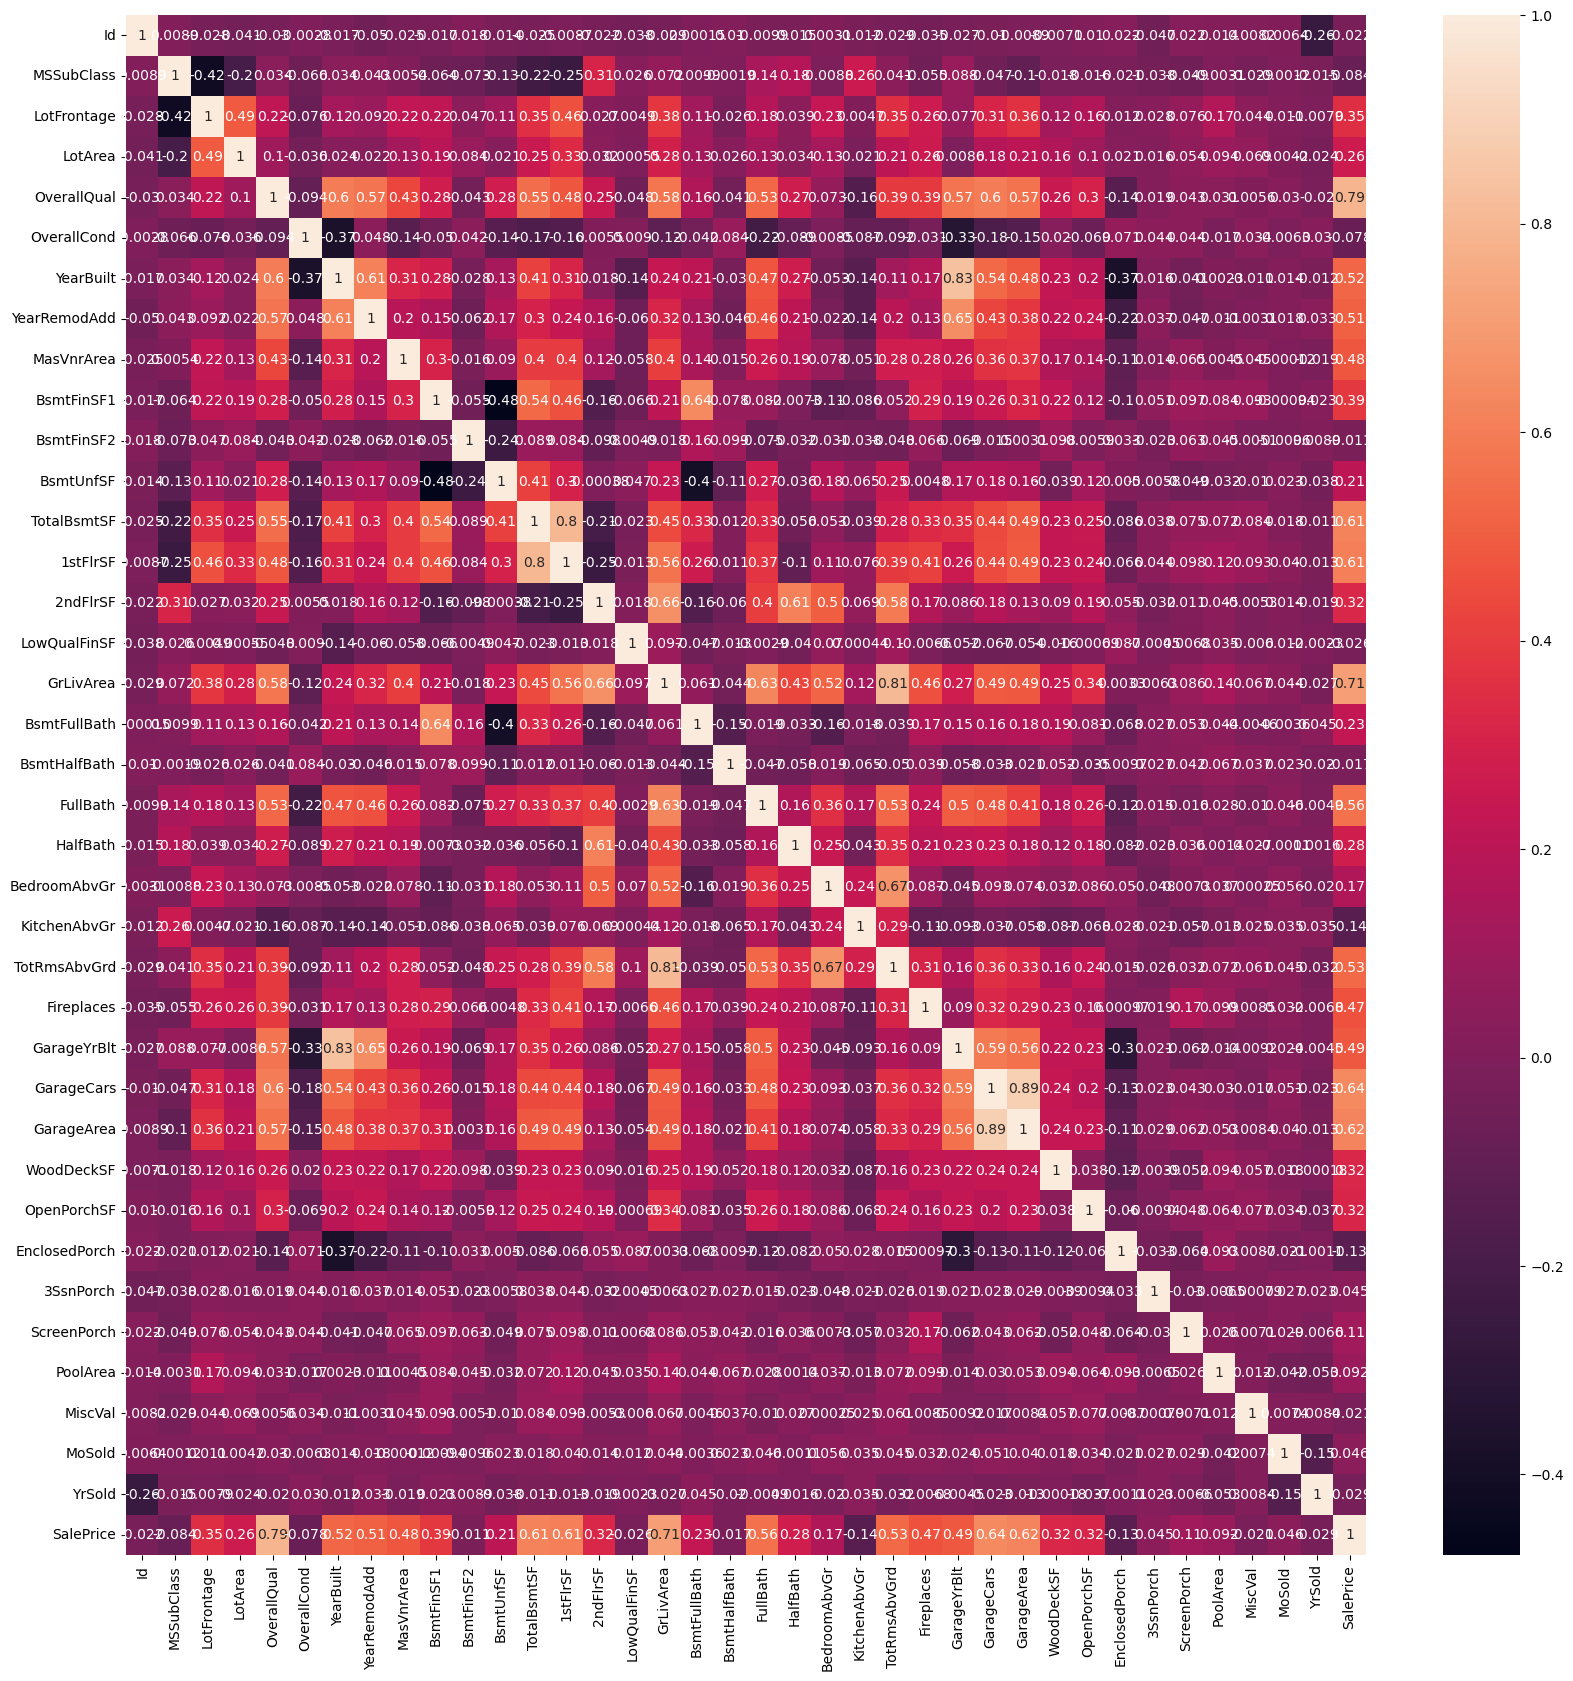

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [22]:
abs(df.corr()['SalePrice'].sort_values(ascending=False)) 
# satış fiyatında hangi özellikler ne kadar etkili

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

In [23]:
df.isnull().sum() # Boş verileri kontrol

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

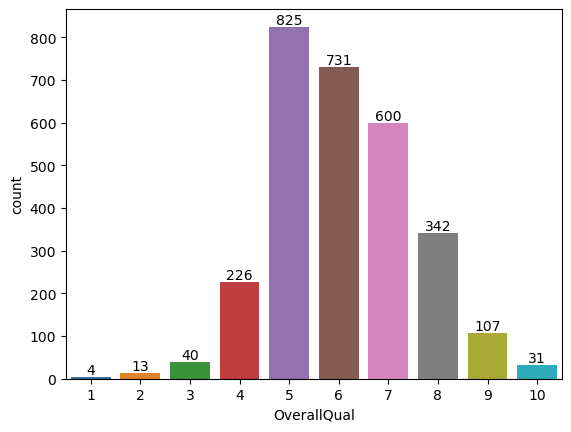

In [24]:
ax=sns.countplot(x=df["OverallQual"]);
ax.bar_label(ax.containers[0]);
#Grafikle gösterim

In [25]:
df["OverallQual"].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

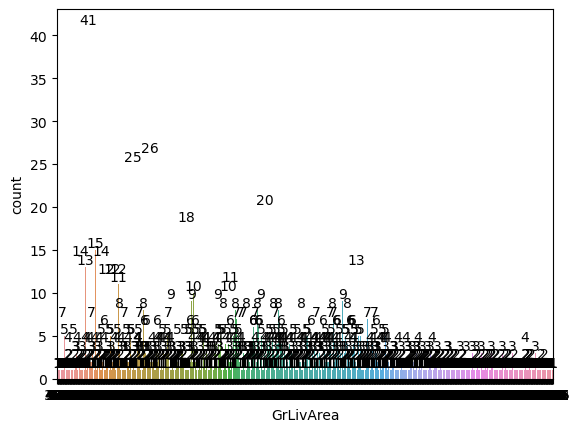

In [26]:
ax=sns.countplot(x=df["GrLivArea"]);
ax.bar_label(ax.containers[0]);
#Grafikle gösterim

In [27]:
df["GrLivArea"].value_counts()

864     41
1092    26
1040    25
1456    20
1200    18
        ..
1459     1
1247     1
438      1
2622     1
1778     1
Name: GrLivArea, Length: 1292, dtype: int64

In [28]:
df["GarageCars"].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

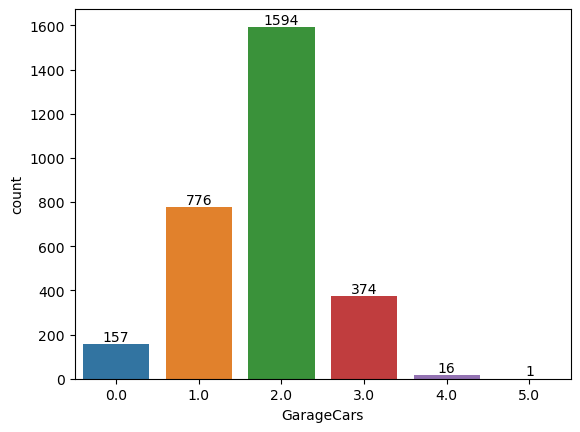

In [29]:
ax=sns.countplot(x=df["GarageCars"]);
ax.bar_label(ax.containers[0]);
#Grafikle gösterim

In [30]:
### Boş veriyi doldurma

In [31]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].mean()) #ortalama değerle doldu

In [32]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [33]:
df["MSZoning"]=df["MSZoning"].fillna("RL") #en çok tekrar eden RL ile boştakilere değer verdik

In [34]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [35]:
df["SaleType"]=df["SaleType"].fillna("WD")

In [36]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [37]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1207,2668,60,RL,65.000000,10237,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,NaN
600,601,60,RL,74.000000,10927,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,275000.0
846,2307,120,RL,41.000000,6289,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,NaN
1289,1290,60,RL,86.000000,11065,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000.0
859,860,60,RL,69.305795,11029,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,250000.0


In [38]:
# sözel verileri sayısal hale getirdik
df=pd.get_dummies(df,drop_first=True)

In [39]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
#verileri train ve test olarak ayırdık
train=df[:1459]
test=df[1459:]

In [41]:
x_train=train[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF",
     "1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd",
      "GarageYrBlt","MasVnrArea","Fireplaces","BsmtFinSF1","LotFrontage",
     "WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath","LotArea","BsmtFullBath",
     "BsmtUnfSF",]]
y_train=train[["SalePrice"]]

In [42]:
df.dropna(subset=["SalePrice"],inplace=True)

In [43]:
x_train.shape,y_train.shape

((1459, 22), (1459, 1))

In [44]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
#Boş değerleri ortalama ile doldu
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())
test = test.fillna(test.mean())


# Regression Modelling

In [46]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_train)

C:\Users\merve\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_train)

C:\Users\merve\AppData\Local\Temp\ipykernel_8524\2964804795.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


In [49]:
## Model Performance

In [50]:
print("Gradient Boosting Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_gbr))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_gbr))
print()
print("Random Forest Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_rfr))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_rfr))

Gradient Boosting Regressor:
Mean Absolute Error: 12199.20683705433
Mean Squared Error: 282193687.75592566

Random Forest Regressor:
Mean Absolute Error: 6795.895656385653
Mean Squared Error: 127199110.5950592


# Regression Modelling with Auto Machine Learning

In [51]:
#!pip install pycaret

In [52]:
from pycaret.regression import*

In [53]:
setup(df,target="SalePrice")

,Description,Value
0,Session id,8835
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 247)"
4,Transformed data shape,"(1460, 247)"
5,Transformed train set shape,"(1021, 247)"
6,Transformed test set shape,"(439, 247)"
7,Numeric features,246
8,Rows with missing values,6.1%
9,Preprocess,True


In [54]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15953.0814,694762422.5424,25853.2460,0.8717,0.1342,0.0952,9.6210
lightgbm,Light Gradient Boosting Machine,16067.8800,734263273.0277,26557.3757,0.8633,0.1351,0.0952,10.2960
xgboost,Extreme Gradient Boosting,17367.4144,781585353.6000,27178.9232,0.8584,0.1428,0.1031,11.3690
rf,Random Forest Regressor,17584.4024,850311432.6305,28709.0867,0.8409,0.1468,0.1053,13.5000
et,Extra Trees Regressor,17692.9441,869367263.2654,28801.8276,0.8387,0.1508,0.1073,14.1970
ada,AdaBoost Regressor,23198.0272,1155823835.2063,33756.4649,0.7819,0.1877,0.1490,11.4530
ridge,Ridge Regression,19427.3554,1338797528.0077,34100.5912,0.7382,0.1623,0.1180,6.1550
dt,Decision Tree Regressor,25525.9016,1472848494.8597,37545.5899,0.7232,0.2114,0.1506,7.6140
en,Elastic Net,20302.9828,1509272737.6813,36454.4108,0.7089,0.1614,0.1188,6.3350
omp,Orthogonal Matching Pursuit,20532.6372,1558433902.4587,37348.8245,0.6956,0.1764,0.1238,6.7980


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [55]:
predictions=predict_model(best_model,df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,12590.0612,544423042.6761,23332.8747,0.9137,0.1046,0.0726


In [56]:
result=predictions[['SalePrice']]

In [57]:
result.sample(5)

,SalePrice
139,231500.0
219,167240.0
862,152000.0
820,183000.0
440,555000.0


# Regression Modelling with Deep Learning

In [58]:
#!pip install tensorflow

In [59]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,train_size=0.80,random_state=42)

In [62]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [63]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=450,verbose=1)

Epoch 1/450
10/10 [==============================] - 4s 67ms/step - loss: 38688223232.0000 - val_loss: 35430027264.0000
Epoch 2/450
10/10 [==============================] - 0s 17ms/step - loss: 35410706432.0000 - val_loss: 29277569024.0000
Epoch 3/450
10/10 [==============================] - 0s 21ms/step - loss: 25835024384.0000 - val_loss: 14272367616.0000
Epoch 4/450
10/10 [==============================] - 0s 24ms/step - loss: 12731527168.0000 - val_loss: 8671321088.0000
Epoch 5/450
10/10 [==============================] - 0s 21ms/step - loss: 12011540480.0000 - val_loss: 6153588736.0000
Epoch 6/450
10/10 [==============================] - 0s 22ms/step - loss: 8899894272.0000 - val_loss: 4895692800.0000
Epoch 7/450
10/10 [==============================] - 0s 22ms/step - loss: 6885985792.0000 - val_loss: 3683396096.0000
Epoch 8/450
10/10 [==============================] - 0s 24ms/step - loss: 5563485696.0000 - val_loss: 3095426560.0000
Epoch 9/450
10/10 [=============================

Epoch 70/450
10/10 [==============================] - 0s 19ms/step - loss: 2011198208.0000 - val_loss: 1383249920.0000
Epoch 71/450
10/10 [==============================] - 0s 19ms/step - loss: 2744185088.0000 - val_loss: 1481751168.0000
Epoch 72/450
10/10 [==============================] - 0s 18ms/step - loss: 2702862848.0000 - val_loss: 1708593664.0000
Epoch 73/450
10/10 [==============================] - 0s 19ms/step - loss: 2543272448.0000 - val_loss: 1337683200.0000
Epoch 74/450
10/10 [==============================] - 0s 18ms/step - loss: 2156827136.0000 - val_loss: 1330431360.0000
Epoch 75/450
10/10 [==============================] - 0s 18ms/step - loss: 2053780352.0000 - val_loss: 1282394752.0000
Epoch 76/450
10/10 [==============================] - 0s 18ms/step - loss: 2019761152.0000 - val_loss: 1270220288.0000
Epoch 77/450
10/10 [==============================] - 0s 18ms/step - loss: 1990063616.0000 - val_loss: 1262834944.0000
Epoch 78/450
10/10 [============================

10/10 [==============================] - 0s 21ms/step - loss: 1516003072.0000 - val_loss: 1353351936.0000
Epoch 207/450
10/10 [==============================] - 0s 20ms/step - loss: 1512641152.0000 - val_loss: 1366658176.0000
Epoch 208/450
10/10 [==============================] - 0s 19ms/step - loss: 1561138432.0000 - val_loss: 1277962112.0000
Epoch 209/450
10/10 [==============================] - 0s 19ms/step - loss: 1567248256.0000 - val_loss: 1362668544.0000
Epoch 210/450
10/10 [==============================] - 0s 19ms/step - loss: 1527995008.0000 - val_loss: 1312155648.0000
Epoch 211/450
10/10 [==============================] - 0s 28ms/step - loss: 1523510016.0000 - val_loss: 1476869632.0000
Epoch 212/450
10/10 [==============================] - 0s 25ms/step - loss: 1570345600.0000 - val_loss: 1548444288.0000
Epoch 213/450
10/10 [==============================] - 0s 20ms/step - loss: 1565914880.0000 - val_loss: 1301835776.0000
Epoch 214/450
10/10 [==============================] -

10/10 [==============================] - 0s 22ms/step - loss: 1281545344.0000 - val_loss: 1277833344.0000
Epoch 343/450
10/10 [==============================] - 0s 21ms/step - loss: 1238078592.0000 - val_loss: 1300120448.0000
Epoch 344/450
10/10 [==============================] - 0s 21ms/step - loss: 1236644480.0000 - val_loss: 1352670592.0000
Epoch 345/450
10/10 [==============================] - 0s 21ms/step - loss: 1236038784.0000 - val_loss: 1407368832.0000
Epoch 346/450
10/10 [==============================] - 0s 22ms/step - loss: 1269156608.0000 - val_loss: 1339023744.0000
Epoch 347/450
10/10 [==============================] - 0s 22ms/step - loss: 1239956096.0000 - val_loss: 1286026880.0000
Epoch 348/450
10/10 [==============================] - 0s 21ms/step - loss: 1247778304.0000 - val_loss: 1295659264.0000
Epoch 349/450
10/10 [==============================] - 0s 21ms/step - loss: 1244756864.0000 - val_loss: 1410890368.0000
Epoch 350/450
10/10 [==============================] -

<AxesSubplot:>

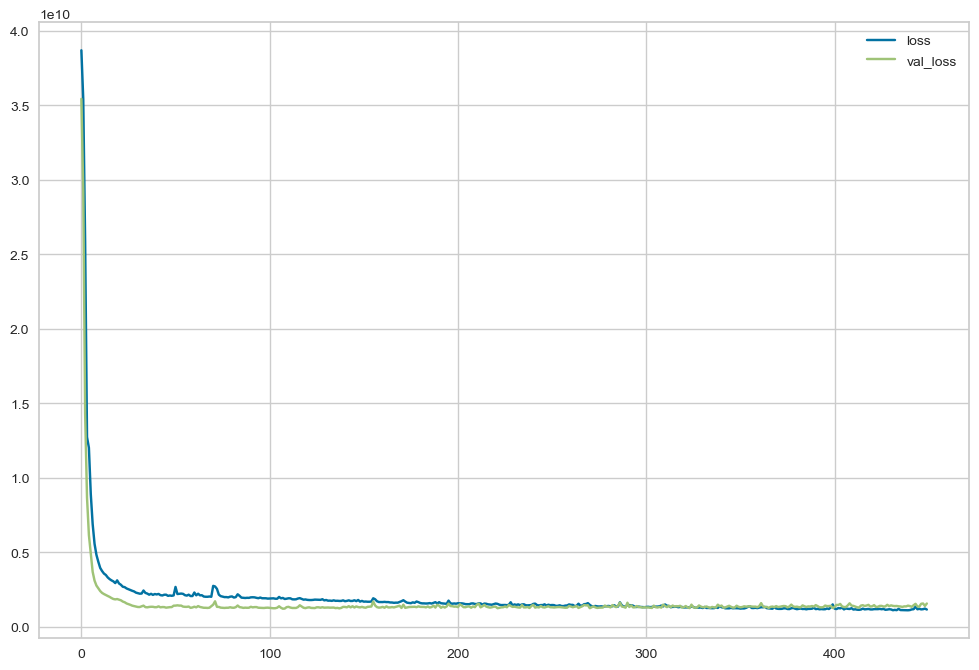

In [64]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))